<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-train,-test,-and-validation-sets" data-toc-modified-id="Prepare-train,-test,-and-validation-sets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare train, test, and validation sets</a></span><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis-(EDA)" data-toc-modified-id="Exploratory-data-analysis-(EDA)-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exploratory data analysis (EDA)</a></span></li></ul></li><li><span><a href="#Load-embedding" data-toc-modified-id="Load-embedding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load embedding</a></span></li><li><span><a href="#Prepare-features-(X)-and-labels-(Y)" data-toc-modified-id="Prepare-features-(X)-and-labels-(Y)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prepare features (X) and labels (Y)</a></span><ul class="toc-item"><li><span><a href="#Tokenization-and-padding" data-toc-modified-id="Tokenization-and-padding-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tokenization and padding</a></span></li><li><span><a href="#Creating-an-embedding-matrix" data-toc-modified-id="Creating-an-embedding-matrix-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Creating an embedding matrix</a></span></li><li><span><a href="#Encoding-the-labels" data-toc-modified-id="Encoding-the-labels-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Encoding the labels</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#GRU" data-toc-modified-id="GRU-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>GRU</a></span><ul class="toc-item"><li><span><a href="#Define-the-model" data-toc-modified-id="Define-the-model-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Define the model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Save-the-model" data-toc-modified-id="Save-the-model-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Save the model</a></span></li></ul></li><li><span><a href="#Character-level-CNN" data-toc-modified-id="Character-level-CNN-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Character-level CNN</a></span><ul class="toc-item"><li><span><a href="#Define-the-model" data-toc-modified-id="Define-the-model-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Define the model</a></span></li><li><span><a href="#Train-the-model" data-toc-modified-id="Train-the-model-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Train the model</a></span></li><li><span><a href="#Save-the-model" data-toc-modified-id="Save-the-model-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Save the model</a></span></li></ul></li><li><span><a href="#Transformer-(TODO)" data-toc-modified-id="Transformer-(TODO)-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Transformer (TODO)</a></span></li></ul></li><li><span><a href="#Make-the-prediction-on-the-test-set" data-toc-modified-id="Make-the-prediction-on-the-test-set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Make the prediction on the test set</a></span><ul class="toc-item"><li><span><a href="#Train-the-model-on-whole-trainig-set" data-toc-modified-id="Train-the-model-on-whole-trainig-set-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Train the model on whole trainig set</a></span></li><li><span><a href="#Make-the-prediction-on-the-test-set" data-toc-modified-id="Make-the-prediction-on-the-test-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Make the prediction on the test set</a></span></li></ul></li></ul></div>

 
Which Novel Do I Belong To?

In this task, you are expected to learn a Machine Learning model that classifies a given line as belonging to one of the following 12 novels:

0: alice_in_wonderland
1: dracula
2: dubliners
3: great_expectations
4: hard_times
5: huckleberry_finn
6: les_miserable
7: moby_dick
8: oliver_twist
9: peter_pan
10: talw_of_two_cities
11: tom_sawyer


Description:

You are provided with a zip file (offline_challenge.zip) containing three text files - xtrain.txt, ytrain.txt, xtest.txt. Each line in xtrain.txt and xtest.txt comes from a different novel. The data has been obfuscated, however the patterns in them are preserved. The novel ids corresponding to xtrain.txt are specified in ytrain.txt. You can use these labels to train a Machine Learning model (Deep Learning preferred).

With the learned model, predict the novel ids of the lines in xtest.txt (one prediction per line). As part of your submission, include

a) your predictions (in the same format as ytrain.txt)
b) Expected accuracy on the test set
c) the source code for training and prediction (< 10MB)
d) a brief description of your method (optional)


In [236]:
from matplotlib import pyplot


import numpy as np # linear algebra
from numpy import genfromtxt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

import keras
from keras.models import Model, load_model, Sequential
from keras.layers import Dense, Input, Dropout, MaxPooling1D, Conv1D, GlobalMaxPool1D, Bidirectional
from keras.layers import LSTM, Lambda, Bidirectional, concatenate, BatchNormalization, Embedding
from keras.layers import Reshape, RepeatVector
from keras.layers import TimeDistributed
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
import keras.backend as K
from keras.models import load_model

import IPython
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot




In [2]:
path = '../offline_challenge/'

x_train_file = path + 'xtrain_obfuscated.txt'
y_train_file = path + 'ytrain.txt'
x_test_file = path + 'xtest_obfuscated.txt'


In [53]:
with open(x_train_file) as f:
    xtrain_obfuscated = f.read().strip().lower().split('\n')
    
with open(y_train_file) as f:
    ytrain = f.read().strip().split('\n')
for i in range(len(ytrain)):
    ytrain[i] = int(ytrain[i])

with open(x_test_file) as f:
    xtest_obfuscated = f.read().strip().lower().split('\n')
    
    

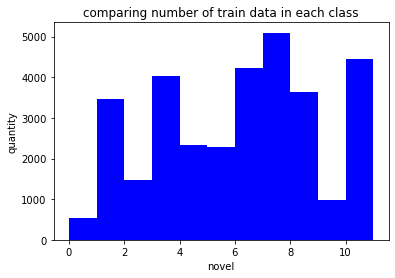

"\nThe data set appears to be imbalanced as class '0' is represented by very few data points as compared\nto class 7 or class 6\n\n"

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(ytrain, bins=range(min(ytrain), max(ytrain) + 1, 1),
              alpha=1, color="blue")
plt.xlabel("novel")
plt.ylabel("quantity")
plt.title("comparing number of train data in each class")
plt.show()
'''
The data set appears to be imbalanced as class '0' is represented by very few data points as compared
to class 7 or class 6

'''



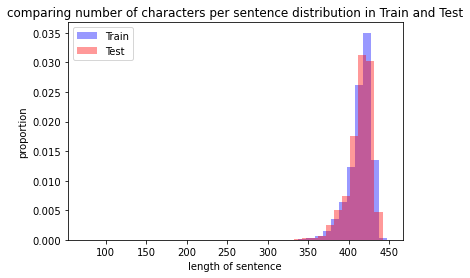

In [57]:
# Length of train and test data distribution

sentence_lengths_train = [ len(sent) for sent in xtrain_obfuscated]
sentence_lengths_test = [ len(sent) for sent in xtest_obfuscated]

plt.hist(sentence_lengths_train, bins=range(min(sentence_lengths_train), max(sentence_lengths_train) + 1, 10), 
              alpha=0.4, color="blue", density=True)
plt.hist(sentence_lengths_test, bins=range(min(sentence_lengths_test), max(sentence_lengths_test) + 1, 10),
              alpha=0.4, color="red", density=True)
labels = ['Train',"Test"]
plt.legend(labels)
plt.xlabel("length of sentence")
plt.ylabel("proportion")
plt.title("comparing number of characters per sentence distribution in Train and Test")
plt.show()


In [75]:
with open(x_train_file) as f:
    x_train = f.read().split('\n')
x_train = x_train[:-1]

with open(y_train_file) as f:
    y_train = f.read().split('\n')
y_train = [int(y) for y in y_train if y.isdigit()] 


In [79]:
max_char = 26
max_sent_len = 0
for sent in x_train:
    max_sent_len = max(max_sent_len, len(sent))




In [93]:
y_train = np.asarray(y_train)
y_train = y_train.reshape(-1,1)


In [94]:
#One hot encoding for labels
y_train = OneHotEncoder(sparse=False).fit_transform(y_train)



In [ ]:
# One hot feature generation
# MaxLen = 452. 
# Other sentences are 0 padded
x_train_onehot = []

for i in range(len(x_train)):
    temp = np.zeros((max_sent_len, max_char))
    for j in range(len(x_train[i])):
        temp[j][ord(x_train[i][j]) - ord('a')] = 1
    x_train_onehot.append(temp)
    
x_train_onehot = np.asarray(x_train_onehot)

x_train_onehot = x_train_onehot.reshape((x_train_onehot.shape[0], 
                                         x_train_onehot.shape[1], 
                                         x_train_onehot.shape[2], 
                                         1))



97

## Prepare train, test, and validation sets


In [154]:
with open(x_train_file) as f:
    x_train_all = f.read().strip().lower().split('\n')
    
with open(y_train_file) as f:
    y_train = f.read().strip().split('\n')
for i in range(len(ytrain)):
    y_train[i] = int(ytrain[i])

with open(x_test_file) as f:
    x_test = f.read().strip().lower().split('\n')
    
    

### Exploratory data analysis (EDA)


In [155]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train, test_size=0.2, random_state=42)


## Load embedding

https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html


- Fast text


In [217]:
def get_embedding(embedding_file):
    embedding_dict = {}
    with open(embedding_file) as f:
        for line in tqdm(f):
            values = line.split()
            word = values[0]
            embedding_dict[word] = np.asarray(values[1:], dtype='float32')
    return embedding_dict



In [218]:
#glove_path = '../glove.6B.300d.txt'
#glove_path = '../glove.840B.300d.txt'
#glove_embedding = {}
#glove_embedding = get_embedding(glove_path)

#fasttext_path = '../wiki-news-300d-1M.vec'
fasttext_path = '../crawl-300d-2M.vec'
fasttext_embedding = {}
fasttext_embedding = get_embedding(fasttext_path)


400000it [00:35, 11409.46it/s]
1999996it [02:52, 11590.40it/s]


## Prepare features (X) and labels (Y)



### Tokenization and padding


In [219]:

max_features = None
token = text.Tokenizer(num_words=max_features, char_level=True)

token.fit_on_texts(list(x_train_all) + list(x_test))
x_train_seq = token.texts_to_sequences(x_train)
x_train_all_seq = token.texts_to_sequences(x_train_all)
x_valid_seq = token.texts_to_sequences(x_valid)
x_test_seq = token.texts_to_sequences(x_test)

# zero pad the sequences
#max_sent_len = 200
max_sent_len = max([len(sent) for sent in x_train_all])
x_train_seq = sequence.pad_sequences(x_train_seq, maxlen=max_sent_len)
x_train_all_seq = sequence.pad_sequences(x_train_all_seq, maxlen=max_sent_len)
x_valid_seq = sequence.pad_sequences(x_valid_seq, maxlen=max_sent_len)
x_test_seq = sequence.pad_sequences(x_test_seq, maxlen=max_sent_len)

word_index = token.word_index


In [220]:
print(len(x_train_seq))
print(len(x_valid_seq))
print(len(x_test_seq))

print(len(x_train_seq[0]))

print(x_train_seq[0])
print(word_index)


26010
6503
3000
452
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 15 12  4  9  5 14 12 17  1  2 13 17 15 12  8  7
  6  5  8  7 15 12  3  4 13  4  4  9 10  3 21 10  1  2  8  7 11  3 13  4
  1  2  9 25 13 17  8  7  4  9 10  3  1  2 10  3  1  6  4  9  3  4  1  2
  1  6  8  7  6 16  1  2  9  7  9  7  3  4 19 20  1  2  8  7 11  3 22 21
 12 17  1  2  1  2 16 11  1  6 13  4  8  7 12 16 15 18  8  7  6  5  1  2
  1  6  5 14  8  7  6  5  6 16  1  2  4  9  3  4  1  2  8  7  6  5  8  7
 19 20  1  2 11  3 21 10  3  4 11  3 19 20  1  2 13 17 13  4  8  7 11  3
 21 10  5 14 10  3 21 10  1  2  6 16  4  9  3  4  1  6  3  4  5 14 19 20
  1  2  8  7 11  3  1  6  1  2 13  4 15 12  6  5  5 14 19 20 10  3  1  6
  1  2 13  4  8  7 15 11  8  7  1  2 15 12  8  7  1  6 21 10  5 14  6  5
  1  6 13  4  3  4 15 12  1  2  6  5  8  7 11  3  1  2 15 12  8  7  4  9
  6  5 12 16  1  6  1  2  1  6  3  4 13  4  6  5  5 14 17 18 22 21  1  2
 16 11 13  4  6  5 13 25  1  2 

### Creating an embedding matrix


In [221]:
embedding_len=300


In [222]:
# embedding matrix
def get_embedding_matrix(embedding, 
                         word_index, 
                         embedding_len=300):
    embedding_matrix = np.zeros((len(word_index) + 1, embedding_len))
    for word, i in tqdm(word_index.items()):
        embedding_vector = embedding.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix
        
    

In [223]:

fasttext_embedding_matrix = get_embedding_matrix(embedding=fasttext_embedding,
                                                 word_index=word_index,
                                                 embedding_len=embedding_len,
                                                )


100%|██████████| 26/26 [00:00<00:00, 11339.49it/s]


In [224]:
glove_embedding_matrix = get_embedding_matrix(embedding=glove_embedding,
                                              word_index=word_index,
                                              embedding_len=embedding_len,
                                             )


100%|██████████| 26/26 [00:00<00:00, 1621.88it/s]


### Encoding the labels


In [225]:

y_train_en = np_utils.to_categorical((y_train))
y_train_all_en = np_utils.to_categorical((y_train_all))
y_valid_en = np_utils.to_categorical((y_valid))



In [230]:
def plot_confusion_matrix(y_test, y_pred):
    confusion_mtx = confusion_matrix(y_test, y_pred) 
    f,ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Greens", linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    return

def plot_learning_curves(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')

    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Accuracy')
    pyplot.plot(history.history['acc'], color='blue', label='train')
    pyplot.plot(history.history['val_acc'], color='orange', label='test')
    pyplot.show()
    
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    #pyplot.close()
    #image = imread(filename + '_plot.png')
    #pyplot.figure(figsize=(10, 25))
    #pyplot.imshow(image)
    return 


## Model Evaluation



### Parameters


In [232]:
n_classes = 12
batch_size = 32
epochs = 100

model_dict = {}


### GRU

- Fast text


#### Define the model

In [273]:
def define_gru_model(word_index, 
                     max_sent_len, 
                     embedding_matrix,
                    ):
    
    model = Sequential()
    model.add(Embedding(len(word_index) + 1,
                         embedding_matrix.shape[1],
                         weights=[embedding_matrix],
                         input_length=max_sent_len,
                         trainable=False))
    model.add(SpatialDropout1D(0.3))
    model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3))
    #model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3, return_sequences=True))
    #model.add(GRU(100, dropout=0.3, recurrent_dropout=0.3))
    #model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_classes))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

    return model


#### Train the model


In [ ]:

model = define_gru_model(word_index=word_index, 
                         max_sent_len=max_sent_len, 
                         embedding_matrix=fasttext_embedding_matrix,
                        )

# Fit the model with early stopping callback
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')

history = model.fit(x=x_train_seq, 
                    y=y_train_en, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_valid_seq, y_valid_en),
                    #callbacks=[earlystop],
                   )

plot_learning_curves(history)

model_dict['gru_fasttext'] = model


Epoch 1/100
790/813 [============================>.] - ETA: 14s - loss: 2.2890 - acc: 0.1820

#### Save the model


In [ ]:
model_dict['gru_fasttext'].save('gru_fasttext_{}.h5'.format(epochs))


### Character-level CNN

- Fast text

https://www.kaggle.com/kmader/character-level-cnn-classification-with-dilations

https://machinelearningmastery.com/best-practices-document-classification-deep-learning/

* Don’t Use Dropout in Convolutional Networks

https://www.kdnuggets.com/2018/09/dropout-convolutional-networks.html


#### Define the model


In [ ]:
def define_cnn_model(word_index, 
                     max_sent_len,
                     embedding_matrix,
                    ):
    model = Sequential()

    model.add(Embedding(len(word_index) + 1,
                         embedding_matrix.shape[1],
                         weights=[embedding_matrix],
                         input_length=max_sent_len,
                         trainable=False)
    model.add(Dropout(0.3))

    # add a Convolution1D, which will learn filters
    # word group filters of size filter_length:
    model.add(Conv1D(128,
                     5,
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(5))
    model.add(Conv1D(128,
                     5,
                     activation='relu'))
    model.add(MaxPooling1D(5))
    model.add(BatchNormalization())
    model.add(Conv1D(128,
                     5,
                     activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(3))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(n_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    
    return model
    
    

#### Train the model


Epoch 1/100
813/813 [==============================] - 112s 137ms/step - loss: 2.2859 - acc: 0.1927 - val_loss: 2.1573 - val_acc: 0.2064
Epoch 2/100
813/813 [==============================] - 110s 135ms/step - loss: 2.0270 - acc: 0.2713 - val_loss: 2.2138 - val_acc: 0.2313
Epoch 3/100
813/813 [==============================] - 114s 140ms/step - loss: 1.7362 - acc: 0.3904 - val_loss: 1.7269 - val_acc: 0.3874
Epoch 4/100
813/813 [==============================] - 116s 142ms/step - loss: 1.5079 - acc: 0.4792 - val_loss: 2.3386 - val_acc: 0.3480
Epoch 5/100
813/813 [==============================] - 108s 133ms/step - loss: 1.3610 - acc: 0.5320 - val_loss: 1.3003 - val_acc: 0.5308
Epoch 6/100
813/813 [==============================] - 106s 130ms/step - loss: 1.2522 - acc: 0.5696 - val_loss: 1.6830 - val_acc: 0.4822
Epoch 7/100
813/813 [==============================] - 105s 130ms/step - loss: 1.1643 - acc: 0.5992 - val_loss: 1.7114 - val_acc: 0.4730
Epoch 8/100
813/813 [====================

813/813 [==============================] - 103s 126ms/step - loss: 0.1192 - acc: 0.9631 - val_loss: 2.1084 - val_acc: 0.6565
Epoch 61/100
813/813 [==============================] - 102s 125ms/step - loss: 0.1200 - acc: 0.9624 - val_loss: 2.0888 - val_acc: 0.6554
Epoch 62/100
813/813 [==============================] - 108s 133ms/step - loss: 0.1086 - acc: 0.9655 - val_loss: 2.3849 - val_acc: 0.6505
Epoch 63/100
813/813 [==============================] - 103s 126ms/step - loss: 0.1162 - acc: 0.9654 - val_loss: 2.1970 - val_acc: 0.6545
Epoch 64/100
813/813 [==============================] - 104s 128ms/step - loss: 0.1136 - acc: 0.9636 - val_loss: 2.1959 - val_acc: 0.6565
Epoch 65/100
813/813 [==============================] - 103s 127ms/step - loss: 0.1040 - acc: 0.9654 - val_loss: 2.6179 - val_acc: 0.6229
Epoch 66/100
813/813 [==============================] - 103s 126ms/step - loss: 0.1185 - acc: 0.9635 - val_loss: 2.2559 - val_acc: 0.6328
Epoch 67/100
813/813 [=========================

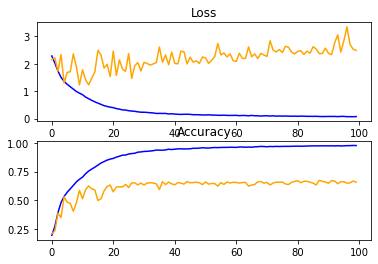

In [234]:

model = define_cnn_model(word_index=word_index, 
                         max_sent_len=max_sent_len,
                         embedding_matrix=fasttext_embedding_matrix,
                        )

#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=0, mode='auto')
history = model.fit(x=x_train_seq, 
                    y=y_train_en, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    validation_data=(x_valid_seq, y_valid_en),
                    #callbacks=[earlystop],
                   )

plot_learning_curves(history)

model_dict['1dcnn_fasttext'] = model


#### Save the model


In [235]:
model_dict['1dcnn_fasttext'].save('1dcnn_fasttext_{}.h5'.format(epochs))


### Transformer (TODO)


https://atheros.ai/blog/text-classification-with-transformers-in-tensorflow-2

https://www.kaggle.com/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert



## Make the prediction on the test set



### Train the model on whole trainig set


In [ ]:
# model = load_model('1dcnn_fasttext_{}.h5'.format(100))

model = define_cnn_model(word_index=word_index, 
                         max_sent_len=max_sent_len,
                         embedding_matrix=fasttext_embedding_matrix,
                        )

history = model.fit(x=x_train_all_seq, 
                    y=y_train_all_en, 
                    batch_size=batch_size, 
                    epochs=epochs, 
                    verbose=1, 
                    #validation_data=(x_valid_seq, y_valid_en),
                    #callbacks=[earlystop],
                   )


### Make the prediction on the test set


In [241]:
len(x_test_seq)


3000

In [238]:
predictions = model.predict_classes(x_test_seq)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [240]:
len(predictions)

3000

In [249]:
with open('ytest.txt', 'w') as f:
    for pred in predictions:
        f.write("%s\n" % pred)


In [254]:
"""
# test the save function

y_test = []
with open('ytest.txt') as f:
    y_test = f.read().strip().split('\n')

y_test = [int(y) for y in y_test]
print(len(y_test))
print(y_test[0])
"""

"\n# test the save function\n\ny_test = []\nwith open('ytest.txt') as f:\n    y_test = f.read().strip().split('\n')\n\ny_test = [int(y) for y in y_test]\nprint(len(y_test))\nprint(y_test[0])\n"